In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import matplotlib.colors as c

In [2]:
#Los datos fueron tomados de https://archive.stsci.edu/pub/hlsp/acsggct/ 
#Como no me quise poner a scrapearlos con python, los guardé en el archivo de Excel adjunto
A = pd.read_excel('NGC0288.xlsx')

In [3]:
# Cargo el archivo de las Isocronas tomado de http://stellar.dartmouth.edu/models/isolf_new.html
Iso = pd.read_csv("isocronas.iso",comment='#',delim_whitespace=True)
Iso.columns = "EEP M/Mo LogTeff LogG LogL/Lo Gaia_G Gaia_BP Gaia_RP".split() # Columnas de Isocronas
Iso['BP_RP'] = Iso['Gaia_BP'] - Iso['Gaia_RP'] # Índice de Color Gaia
Iso['Mabs'] = 4.83 - 2.5*Iso['LogL/Lo'] # Magnitud Absoluta
Iso

,EEP,M/Mo,LogTeff,LogG,LogL/Lo,Gaia_G,Gaia_BP,Gaia_RP,BP_RP,Mabs
0,3,0.124375,3.5310,5.2634,-2.6530,12.0202,13.2627,10.9735,2.2892,11.46250
1,4,0.140042,3.5357,5.2077,-2.5271,11.6822,12.8866,10.6487,2.2379,11.14775
2,5,0.171622,3.5468,5.1440,-2.3308,11.1350,12.2545,10.1330,2.1215,10.65700
3,6,0.219423,3.5608,5.0910,-2.1152,10.5293,11.5540,9.5661,1.9879,10.11800
4,7,0.276501,3.5712,5.0451,-1.9273,10.0158,10.9801,9.0801,1.9000,9.64825
...,...,...,...,...,...,...,...,...,...,...
10002,275,0.792133,3.5869,0.3918,3.2459,-2.8189,-1.9408,-3.7139,1.7731,-3.28475
10003,276,0.792136,3.5851,0.3619,3.2684,-2.8568,-1.9636,-3.7596,1.7960,-3.34100
10004,277,0.792139,3.5832,0.3328,3.2902,-2.8930,-1.9845,-3.8037,1.8192,-3.39550
10005,278,0.792142,3.5815,0.3050,3.3111,-2.9276,-2.0052,-3.8463,1.8411,-3.44775


In [4]:
# Marco el inicio de cada Isocrona
isoIni = []
for i in range(len(Iso['EEP'])-1):
    #Registro el índice de la lista cuando vuelve a iniciar EEP
    if Iso['EEP'][i+1] < Iso['EEP'][i]: isoIni.append(i+1)
isoIni = np.array(isoIni)
Nisos = len(isoIni)

In [5]:
def HipToGaia(color):
    """
    Conversión de Índices de Color de Hipparcos a Gaia
    https://gea.esac.esa.int/archive/documentation/GDR2/Data_processing/chap_cu5pho/sec_cu5pho_calibr/ssec_cu5pho_PhotTransf.html
    """
    return -0.01146 + 1.315*color -0.1103*color**2 # Filtros de Color de Hipparcos
#     return -0.04212 +1.286*color -0.09494*color**2 # Filtros de Color de Johnson-Cousins

A['BP_RP'] = HipToGaia(A['VIvega'])
A['Mabs'] = A['Vvega'] - 14.95

In [6]:
# PROMEDIAR EL COLOR DE CADA MAGNITUD PARA HACER EL FIT
mini = 3.25
mend = 4.9
N = 50
mags = np.linspace(mend,mini,N)
cols = np.zeros(N)
dm = abs(mend-mini)/N

for i in range(N):
    idx = np.where(np.abs(A['Mabs'] - mags[i]) < dm)
    color = []
    for j in idx:
        color.append(A['BP_RP'][j])
    cols[i] = np.mean(color)

Index(['id', 'x', 'y', 'Vvega', 'err', 'VIvega', 'err.1', 'Ivega', 'err.2',
       'Vground', 'Iground', 'Nv', 'Ni', 'wV', 'wI', 'xsig', 'ysig', 'othv',
       'othi', 'qfitV', 'qfitI', 'RA', 'Dec', 'BP_RP', 'Mabs'],
      dtype='object')


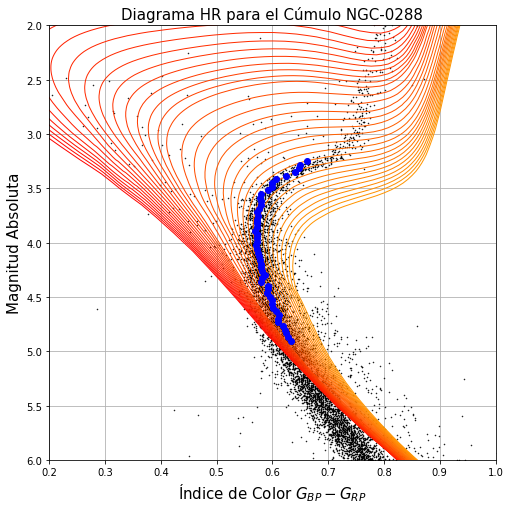

In [7]:
print(A.columns)

plt.figure(figsize=(8,8))
plt.plot(A['BP_RP'],A['Mabs'],'k.',ms=1)

a = 0
for b in isoIni:
    plt.plot(Iso['BP_RP'][a:b],Iso['Mabs'][a:b],lw=1,color=c.hsv_to_rgb((b/1e5,1,1)))
    a = b
    
plt.plot(cols,mags,'bo',label="Datos Promediados M=[{:.1f},{:.1f}]".format(mini,mend))

plt.title("Diagrama HR para el Cúmulo NGC-0288",size=15)
plt.xlabel("Índice de Color $G_{BP}-G_{RP}$",size=15)
plt.ylabel("Magnitud Absoluta",size=15)

plt.xlim([0.2,1])
plt.ylim([6,2])
plt.grid()

Iso = pd.read_csv("isosola.iso",comment='#',delim_whitespace=True)
Iso.columns = "EEP M/Mo LogTeff LogG LogL/Lo Gaia_G Gaia_BP Gaia_RP".split() # Columnas de Isocronas
Iso['BP_RP'] = Iso['Gaia_BP'] - Iso['Gaia_RP'] # Índice de Color Gaia
Iso['Mabs'] = 4.83 - 2.5*Iso['LogL/Lo'] # Magnitud Absoluta
Iso

In [8]:
# Determinación de Mejor Ajuste por Chi-Cuadrado
chis2 = np.zeros(Nisos)

a = 0
for i in range(Nisos):
    b = isoIni[i]
    for j in range(N):
        m = np.where(np.abs(Iso['Mabs'][a:b]-mags[j]) < 0.1)[0][0]
        chis2[i] += (cols[j] - Iso['BP_RP'][a+m])**2
    a = b
        
chis2

array([1.47616175, 1.35867917, 1.25991759, 1.18818322, 1.12390974,
       1.05722941, 0.9861649 , 0.92700108, 0.87247216, 0.81721337,
       0.76379566, 0.70592834, 0.65466531, 0.60512179, 0.55636553,
       0.50567777, 0.462085  , 0.38338893, 0.3199851 , 0.25696359,
       0.2014693 , 0.15242586, 0.11085931, 0.07645065, 0.04980419,
       0.03072516, 0.02093382, 0.02232059, 0.04115992, 0.0836989 ,
       0.14586326, 0.21796863, 0.30395442, 0.39513554, 0.49712308,
       0.58880745])

In [9]:
Nisos,np.argmin(chis2),min(chis2)

(36, 26, 0.02093382493450076)

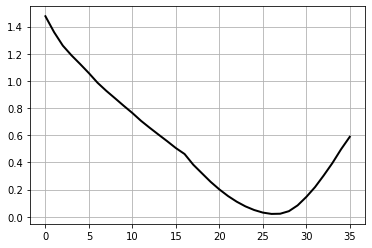

In [10]:
# times = "10.1 10.2 10.3 10.4 10.5".split()
plt.plot(chis2,'k',lw=2)
plt.grid()

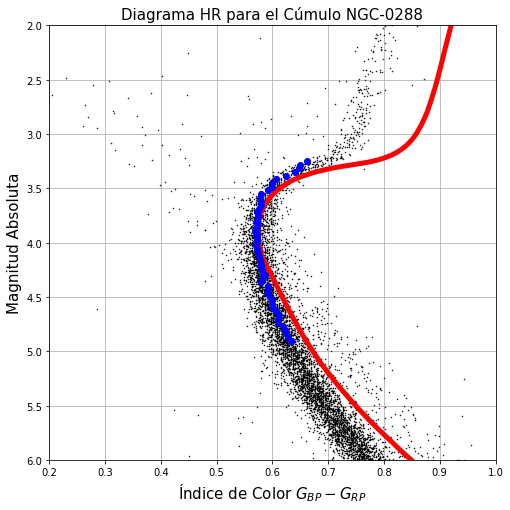

In [11]:
plt.figure(figsize=(8,8))
plt.plot(A['BP_RP'],A['Mabs'],'k.',ms=1)

i = np.argmin(chis2)
a = isoIni[i]
b = isoIni[i+1]
plt.plot(Iso['BP_RP'][a:b],Iso['Mabs'][a:b],lw=5,color='r')
    
plt.plot(cols,mags,'bo',label="Datos Promediados M=[{:.1f},{:.1f}]".format(mini,mend))

plt.title("Diagrama HR para el Cúmulo NGC-0288",size=15)
plt.xlabel("Índice de Color $G_{BP}-G_{RP}$",size=15)
plt.ylabel("Magnitud Absoluta",size=15)

plt.xlim([0.2,1])
plt.ylim([6,2])
plt.grid()